In [1]:
from qiskit import QuantumCircuit
from qiskit.providers.aer import AerSimulator
from qiskit import *
from qiskit.quantum_info import Statevector

https://learn.qiskit.org/course/introduction/the-atoms-of-computation

# Get started

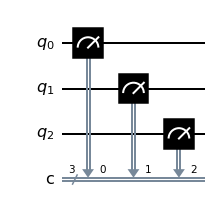

In [18]:
# QuantumCircuit is a constructor and we call it for create a circuit with 
# 3 qubits and 3 classical bits. We need classical bits to store the measurements of our qubits.
qc = QuantumCircuit(3,3, name='hola',global_phase=0)

# We need a way to tell our auqntum computer to measure our qubits and record the results.
# El qubit 0 va al bit 0, el qbut 1 al 1 ...
qc.measure([0,1,2],[0,1,2])

# Dibujamos el circuito
qc.draw(output='mpl')

Now, let's see what the results of running this circuit would be. We will use a quantum simulator, which is a stndard computer calculating what an ideal quantum computer would do. Simulators are very useful tools for designing smaller quantum circuits but they are a bad option if the nummber os qubits is up to 30.


In [25]:
from qiskit.providers.aer import AerSimulator
# Instance the simulator
sim = AerSimulator()
# Run the simulation. The method run return a 'job0, which contains information about the experiment, such as wheter
# the experiment is running or completed, the backend it ran on and the result
job = sim.run(qc)
# Get the results
result = job.result()
# Interpret the results as 'counts' dictionary
result.get_counts()

{'000': 1024}

Quantum computers can have randomness in their results, so it's common to repeat the circuit a few times. This circuit was repeated 1024 times, which is the default number of times to repeat a circuit in Qiskit. By convention, qubits always start in the state 0, and since we are doing nothing to them before measurement, the results are always 0.

# Encoding and input

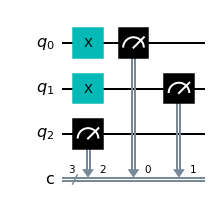

In [35]:
# Create quantum circuit with 3 qubits and 3 classical bits:
qc = QuantumCircuit(3,3)
# Perform X-gates on qubits 0 & 1
qc.x([0,1])
qc.measure([0,1,2],[0,1,2])
# returns a drawing of the circuit
qc.draw(output='mpl')

In [38]:
# Let's simulate the circuit
sim = AerSimulator()
job = sim.run(qc)
result = job.result().get_counts()
result

{'011': 1024}

# Creating an half adder Circuit

First of all, we have to encode the input, then make operations and finally, extract the results. So, for the first part we will use two qubits that encode the input.Moreover, we will use two adittional qbits to make operations, one of them represents the sum and the other the carry. Finally, two classical bits to store the results

Result:  {'10': 1024}


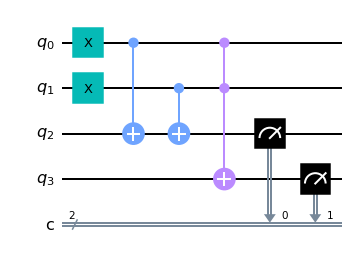

In [52]:
qc = QuantumCircuit(4,2)

# First, our circuit should encode an input (here '11')
qc.x(0)
qc.x(1)
# Next, it should carry out the adder circuit we created
qc.cx(0,2)
qc.cx(1,2)
qc.ccx(0,1,3)
# Finally we will measure the bottom two qubits to extract the output
qc.measure([2,3],[0,1])


# Create the simulator
sim = AerSimulator()
# Run the experiment
job = sim.run(qc)
# Get the result
result = job.result()
# Interpret the results as a counts dictionary
print("Result: ", result.get_counts())


qc.draw(output='mpl')

# Entangling gates
https://learn.qiskit.org/course/introduction/entangled-states

It is important to diferenciate product state and entangled states. To create entanglement, we need to apply multi-qubit gates. The most prominent of these are controlled gates, with the 'cx' and 'cz' gates being the simples examples. Let's see these.

## The Cx Gate (CNOT)

In [15]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
# Create a quantum circuit of two qubits
qc = QuantumCircuit(2)
# This calculates what the state vector of our qubit would be 
# after passing through the circuit 'qc'
ket = Statevector(qc)

ket.draw(output='latex')

<IPython.core.display.Latex object>

The cx acts on two qubits, which are known as the 'control' and the 'target'. Let's try all the possible combination and take from this a learning

In [16]:
# Add a CNOT gate using the qubit 0 as a control and the qubit 1 as a target
qc.cx(0,1)
ket = Statevector(qc)
ket.draw(output='latex')

<IPython.core.display.Latex object>

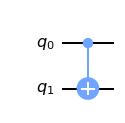

In [17]:
qc.draw(output='mpl')

We notice that nothing happens

In [18]:
# Add a CNOT gate using the qubit 1 as a control and the qubit 0 as a target
qc = QuantumCircuit(2)
qc.cx(1,0)
ket = Statevector(qc)
ket.draw(output='latex')

<IPython.core.display.Latex object>

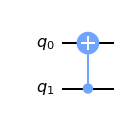

In [19]:
qc.draw(output='mpl')

Okey, no effect. 
This underwhelming behaviour is expected. 
If the control bit is in state $|0>$, cx does nothing. However, if the control is in state $|1>$, the cx perform an X-gate on the target qubit.

In [21]:
# Add a CNOT gate using the qubit 1 as a control and the qubit 0 as a target
qc = QuantumCircuit(2)
# Change the value of the q0
qc.x(1)
# Show the state vector
ket = Statevector(qc)
ket.draw(output='latex')

<IPython.core.display.Latex object>

In [22]:
# Now perform an cx, it will flip the target qubit as well.
qc.cx(1,0)
ket = Statevector(qc)
ket.draw(output='latex')

<IPython.core.display.Latex object>

So far, we have not yet seen any entangelement. That comes when the control qubit is not just a simple $|0>$ or $|1>$, but a superposition of the two. For example, suppose we have the $|+0>$ state from before.

In [24]:
# Let's create a new quantum circuit
qc = QuantumCircuit(2)

qc.h(1)

ket = Statevector(qc)
ket.draw(output='latex')

<IPython.core.display.Latex object>

At this point, we have created a superposition of the qubit 1. Now if we apply the cx, it will act in parallel on the two states. It will leave the $|00>$ state unchanged, since the control qubit there is in state $|0>$. But the state $|10>$ has the control in state $|1>$, so the target is flipped to make the $|11> state

In [25]:
qc.cx(1,0)

ket = Statevector(qc)
ket.draw(output='latex')

<IPython.core.display.Latex object>

Finally, we can say that the result is a entangled state. The cx gate has created entanglement.

## The CZ gate

The cz is a gate whose effect is rather similar to the cx. It also acts on two qubits: the target and control. It also does nothing when the control qubit is in state $|0>$ . But for the control state $|1>$ , it performs a Z-gate to the target.

The Z-gate applied to a single qubit has the effect of doing nothing to $|0>$ , and giving a phase of -1 to the state $|1>$. So for the CZ-gate, it only has any effect at all when both qubits are in state $|1>$ . It doesn't matter which we decided to label 'control' and 'target', the effect is the same. We could equally have defined it as the gate which does nothing when the target state is $|0>$ , and otherwise performs a z on the control.

In [28]:
# Let's create a new quantum circuit
qc = QuantumCircuit(2)

qc.x([0,1])
ket = Statevector(qc)
ket.draw(output='latex')

<IPython.core.display.Latex object>

In [29]:
qc.cz(0,1)
ket = Statevector(qc)
ket.draw(output='latex')

<IPython.core.display.Latex object>

## CX gate revisited

The cx gate is also known as the controlled-X or controlled-NOT, due to its effect of flipping the target bit based on the state of the control. However, just as we saw with the cx gate, other interpretations are also possible.

For example, let's start with the case where both qubits are in the $|+>$ state.

In [33]:
qc = QuantumCircuit(2)

qc.h([0,1])

ket = Statevector(qc)
ket.draw('latex')

<IPython.core.display.Latex object>

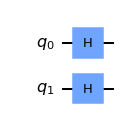

In [34]:
qc.draw('mpl')

Here we will also find that the cx has no effect, no matter which way around we do it.

In [36]:
qc.cx(0,1)

ket = Statevector(qc)
ket.draw('latex')

<IPython.core.display.Latex object>

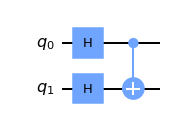

In [37]:
qc.draw('mpl')

It is easy to find out the reason why that. 

However, let's now flip the target qubit ffrom $|+>$ to $|->$ using the single qubit Z-gate

In [41]:
qc = QuantumCircuit(2)

qc.h([0,1])
qc.z(0)

ket = Statevector(qc)
ket.draw('latex')

<IPython.core.display.Latex object>

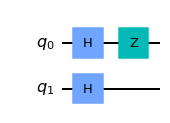

In [42]:
qc.draw('mpl')

If we do cx now, we will see an effect. It fflips the control qubit to $|->$ as well.

In [43]:
qc.cx(1,0)

Statevector(qc).draw('latex')

<IPython.core.display.Latex object>

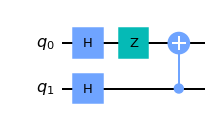

In [44]:
qc.draw('mpl')

Este efeccto se conoce como retroceso de fase. Cuando existe una superposicion en los qubits de control y el objetivo, algunas características de la superposicion de destino pueden retroalimentar el control. Este efecto tambien puede motivar a hacer otra interpretación alternativa de la puerta cx. Podemos pensar que aplica una Z-gate al control si el objetivo está en estado $|->$ y no hace nada si está en estado $|+>$

# Diferencia entre Superposicion y Entrelazamiento

Dado un qubit, ponerlo en estado de superposición significa, asignarle una amplitud de probabilidad distinta de cero a cada uno de sus dos estador de tal manera que el valor del qubit esté indeterminado. Por ejemplo, un qubit que está en estado 0, si le aplicamos una puerta H lo ponemos en superposición, con 50% de probabilidad de que al medirlo colapse en alguno de sus dos posibles estados.

In [6]:
circuit = QuantumCircuit(2)
circuit.h(0)
Statevector(circuit).draw('latex')

<IPython.core.display.Latex object>

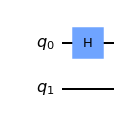

In [7]:
circuit.draw('mpl')

En este ejemplo tenemos un sistema de 2 qubit. Y lo que pasa es que uno de ellos está en estado 0. Por lo que solo nos basta una medición sobre el  qubit_0, que está en superposición para conocer el estado en el que se encuentra el sistema.

In [8]:
circuit = QuantumCircuit(2)
circuit.h([0,1])
Statevector(circuit).draw('latex')

<IPython.core.display.Latex object>

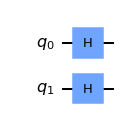

In [9]:
circuit.draw('mpl')

En este caso tenemos otro sistema de 2 qubits. Cada qubit está en estado de superposición, pero no están entrelazados, es decir, aquí un qubit no condiciona al otro, es un sistema aislado que para conocer su estado tendremos que hacer mediciones en cada uno de los dos qubits. Aqui se cumple las ecuaciones de $a_0b_0 = \frac{1}{\sqrt{2}}$,$a_0b_1 = \frac{1}{\sqrt{2}}$,$a_1b_0 = \frac{1}{\sqrt{2}}$,$a_1b_0 = \frac{1}{\sqrt{2}}$ y tal que la suma del cuadrado del modulo $a_i, b_i$ de 1. Las coluciones serían $a_0 = 1, a_1 = 0, b_0 = b_1 = \frac{1}{\sqrt{2}}$.

Estamos en un caso donde el sistema está formado por qubits separables y para explicarlo tenemos que estudiar todos los qubits por separado.

Vamos a busca ahora el entrelazamiento. El entrelazamiento es un estado al que no podríamos llegar si nuestro sistema fuera separable, habría que estudiar el sistema formado por los dos qubits como si fuera un ente solo ya que de otro modo no se podría. Esto se puede ver buenamente reflejado en que si partimos de dos qubits entrelazados e intenamos explicarlos de manera separada, llegaríamos a una contradicción ya que el sistema anterior no podría resolverse.

In [11]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0,1)
Statevector(circuit).draw('latex')

<IPython.core.display.Latex object>

En este circuito, lo que tenemos es un sistema, que si intentamos resolver las ecucaiones veremos que no hay solución, por lo que este estado no podremos llegar nunca partiendo de qubits sin entrelazamiento, es decir, partiendo de un sistema separable. Notamos que hay cierta dependencia de un qubits respecto al otro, ya que por ejmplo tenemos que si realizamos una medición en el qubit $q_0$ y resulta que está en el estado $0$, automáticamente sabemos que el qubit $q_1$ está en el estado 0 también. El entrelazamiento no se puede entender como un sistema de qubits aislados, sino como un sistema de qubits que forman ambos un único ente.

In [21]:
circuit = QuantumCircuit(2)
circuit.x(1)
circuit.h(0)
circuit.cx(0,1)
Statevector(circuit).draw('latex')

<IPython.core.display.Latex object>

El estado de arriba es otro tipo de entrelazaiento. Si medimos el qubit $q_0$ y está en estado 0 sabemos que el qubit $q_1$ está en estado 1 y si $q_0 \rightarrow 0$, entonces $q_1 \rightarrow 1$

# Tipos de entrelazamiento

Vamos a ver las distintas formas que hay de entrelazamiento. Ya sabemos que un entrelazamiento es un estado al que no podríamos llegar si tenemos un sistema separable. Es decir, haciendo producto tensorial con los qubits. 

En la siguiente celda tenemos que 
$$q_0 = q_1 = 0$$
por lo que al entrelazar los qubits tendremos el siguiente estado
$$\frac{\sqrt{2}}{2} \vert 00 \rangle + \frac{\sqrt{2}}{2} \vert 11 \rangle$$

In [26]:
qc = QuantumCircuit(2,1)

qc.h(0)
qc.cx(0,1)

ket = Statevector(qc)

qc.measure(0,0)

ket.draw('latex')

<IPython.core.display.Latex object>

Simulamos el circuito y solo medimos en un qubit, y veremos que automáticamente sabremos el resultado del otro

In [27]:
sim = AerSimulator()
job = sim.run(qc)
result = job.result().get_counts()
result

{'0': 537, '1': 487}

Ahora tenemos que
$$q_1 = 0 \qquad q_0 = 1$$
por lo que al entrelazar los qubits tendremos el siguiente estado
$$\frac{\sqrt{2}}{2} \vert 00 \rangle - \frac{\sqrt{2}}{2} \vert 11 \rangle$$

In [30]:
qc = QuantumCircuit(2,1)

qc.x(0)
qc.h(0)
qc.cx(0,1)

ket = Statevector(qc)

qc.measure(0,0)

ket.draw('latex')

<IPython.core.display.Latex object>

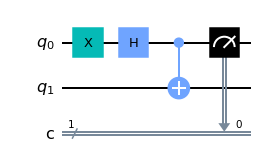

In [31]:
qc.draw('mpl')

Ahora tenemos que
$$q_1 = 1 \qquad q_0 = 0$$
por lo que al entrelazar los qubits tendremos el siguiente estado
$$\frac{\sqrt{2}}{2} \vert 01 \rangle + \frac{\sqrt{2}}{2} \vert 10 \rangle$$

In [36]:
qc = QuantumCircuit(2,1)

qc.x(1)
qc.h(0)
qc.cx(0,1)

ket = Statevector(qc)

qc.measure(0,0)

ket.draw('latex')

<IPython.core.display.Latex object>

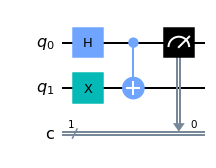

In [37]:
qc.draw('mpl')

In [38]:
qc = QuantumCircuit(2,1)

qc.x([0,1])
qc.h(0)
qc.cx(0,1)

ket = Statevector(qc)

qc.measure(0,0)

ket.draw('latex')

<IPython.core.display.Latex object>

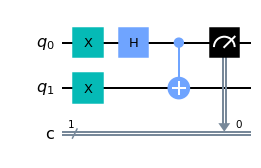

In [39]:
qc.draw('mpl')

In [32]:
circuit = QuantumCircuit(2)
circuit.cx(0,1)
circuit.h(0)
Statevector(circuit).draw('latex')

<IPython.core.display.Latex object>

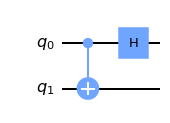

In [33]:
circuit.draw('mpl')

In [34]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0,1)
Statevector(circuit).draw('latex')

<IPython.core.display.Latex object>

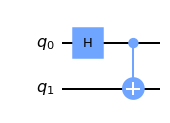

In [29]:
circuit.draw('mpl')